## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Objectives](#section1_2)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Exploratory data analysis (EDA)](#chapter5)
*  [ Data prepocessing](#chapter6)
*  [ Model training](#chapter7)
*  [ Model performance](#chapter8)
*  [ Conclusion and Insights](#chapter9)

## Project Overview <a id="chapter1"><a>

#### 1.1 INTRODUCTION <a id="section1_1"></a>

Recommender systems are algorithms designed to suggest items to users based on various inputs, such as their past behavior and preferences.These systems are essential in many domains, including e-commerce, music, movies, and anime, as they enhance user experience by providing personalized recommendations. 

**Importance in the Context of Anime**

* The anime industry produces a vast and diverse array of content, making it challenging for users to find anime that align with their interests.

* A well-designed recommender system helps users navigate the extensive anime catalog, discovering titles they are likely to enjoy based on their unique tastes.
 
* By delivering personalized recommendations, these systems can increase user engagement and satisfaction, fostering a deeper connection with the platform.


#### 1.2 Objectives <a id="section1_1"></a>

* The primary objective of this project is to develop a hybrid recommender system that combines collaborative and content-based filtering techniques.

* This system aims to predict how users will rate anime titles they have not yet seen, using their historical preferences and interactions.
 
* By accurately predicting user ratings, the recommender system will provide tailored anime suggestions, enhancing the user's discovery process and overall viewing experience.

## IMPORTING PACKAGES <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>

In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=748b59c16329936603319f624e6a6966927ea626e4b6b6c581051247d8825cd0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize plotly offline mode
init_notebook_mode(connected=True)

## LOADING DATA <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Explanation</b> Loading data is a crucial step in any data analysis or machine learning project. It involves reading data from a source (like a CSV file, a database, or an API) and loading it into a format that can be used for analysis and model building. 
</di>

In [4]:
# Load datasets
anime_path = '/kaggle/input/anime-recommender-system-project-2024/anime.csv'
train_path = '/kaggle/input/anime-recommender-system-project-2024/train.csv'
submission_path = '/kaggle/input/anime-recommender-system-project-2024/submission.csv'
test_path='/kaggle/input/anime-recommender-system-project-2024/test.csv'

df_anime = pd.read_csv(anime_path)
df_anime_user_rating = pd.read_csv(train_path)
df_anime_user_id = pd.read_csv(submission_path)
df_anime_test= pd.read_csv(test_path)

Display the anime dataframe

In [5]:
# Display first few rows of anime dataframe
print("Shape of the Anime Dataset:", df_anime.shape)
df_anime.head(3)

Shape of the Anime Dataset: (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


Display the train dataframe

In [6]:
# Display first few rows of train dataframe
print("Shape of the User Rating Dataset:", df_anime_user_rating.shape)
df_anime_user_rating.head(3)


Shape of the User Rating Dataset: (5703555, 3)


,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10


Display the test dataframe

In [7]:
# Display first few rows of test dataframe
print("Shape of the test Dataset:", df_anime_test.shape)
df_anime_test.head(3)


Shape of the test Dataset: (633686, 2)


,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281


In [8]:
# Display first few rows of anime details dataframe
print("Shape of the User Details Dataset:", df_anime_user_id.shape)
df_anime_user_id.head(3)

Shape of the User Details Dataset: (3, 2)


,ID,rating
0,14862_1232,5.3
1,14862_7974,4.0
2,24873_2349,6.0


## DATA CLEANING <a id="chapter4"><a>

<div class="alert alert-block alert-success">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

In [9]:
# Data Cleaning
print(df_anime.isnull().sum())
df_anime['genre'].fillna('Unknown', inplace=True)
df_anime['rating'].fillna(df_anime['rating'].mean(), inplace=True)
df_anime['episodes'].replace('Unknown', np.nan, inplace=True)
df_anime['episodes'] = df_anime['episodes'].astype(float)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


/tmp/ipykernel_18/232782832.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_18/232782832.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[co

In [10]:
print(df_anime_user_rating.isnull().sum())
df_anime_user_rating['rating'].replace(-1, np.nan, inplace=True)

user_id     0
anime_id    0
rating      0
dtype: int64


/tmp/ipykernel_18/2163556426.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [11]:
print(df_anime_test.isnull().sum())
df_anime_test.replace(-1, np.nan, inplace=True)

user_id     0
anime_id    0
dtype: int64


In [12]:
print (df_anime_user_rating.shape)
print (df_anime_test.shape)

(5703555, 3)
(633686, 2)


In [13]:
# Merge datasets
train_merged = pd.merge(df_anime_user_rating,df_anime, on='anime_id')
test_merged = pd.merge(df_anime_test,df_anime, on='anime_id')

In [14]:
print (train_merged.shape)
print (test_merged.shape) 

(5703553, 9)
(633686, 8)


In [15]:
# Exploratory Data Analysis
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


# EXPLORATORY DATA ANALYSIS (EDA) <a id="chapter5"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is a vital step in the data analysis process, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



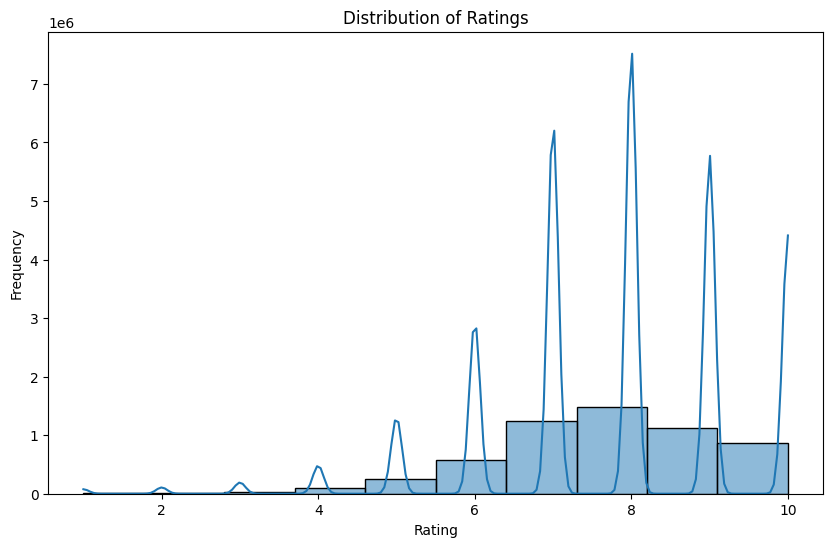

In [16]:
# Distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df_anime_user_rating['rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

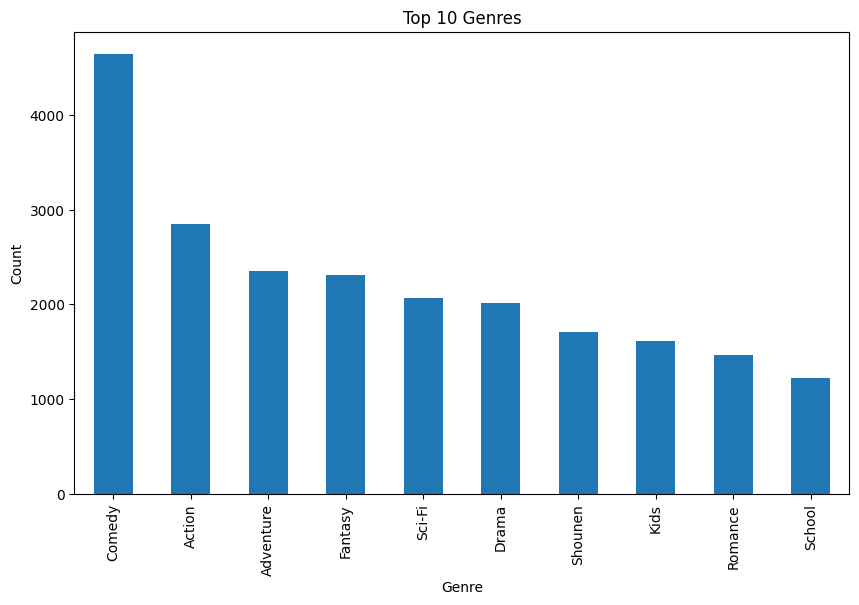

In [17]:
# Top 10 genres
top_genres = df_anime['genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

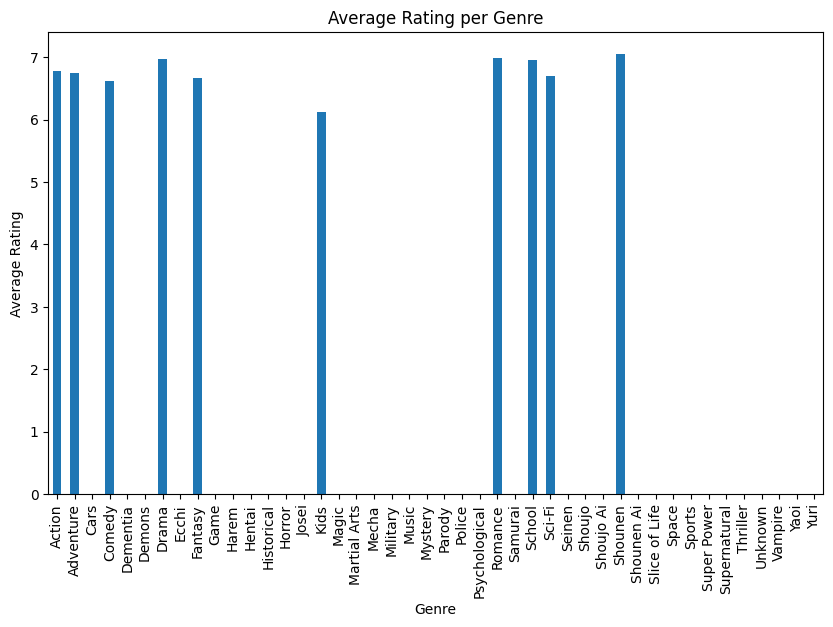

In [18]:
# Average rating per genre
genre_ratings = df_anime['genre'].str.get_dummies(sep=', ').mul(df_anime['rating'], axis=0).sum().sort_values(ascending=False) / top_genres
plt.figure(figsize=(10,6))
genre_ratings.plot(kind='bar')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



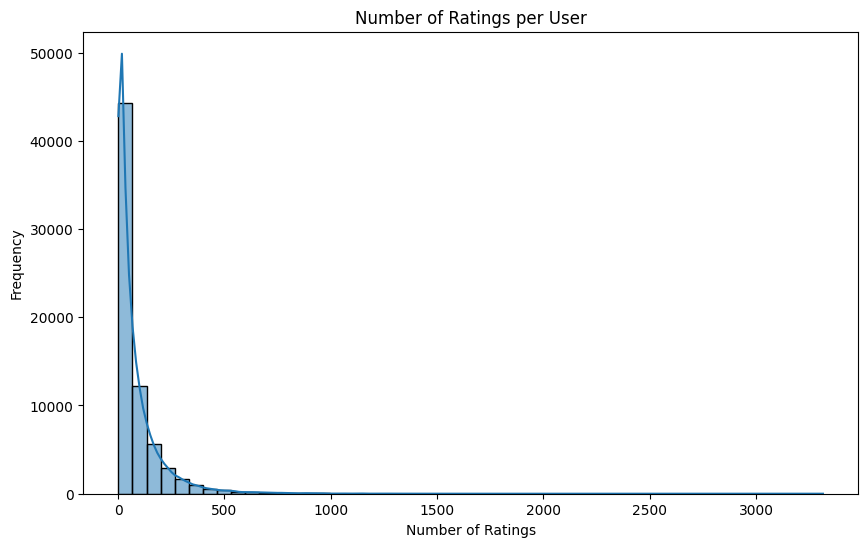

In [19]:
# User behavior analysis
user_ratings_count = df_anime_user_rating.groupby('user_id').size()
plt.figure(figsize=(10,6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



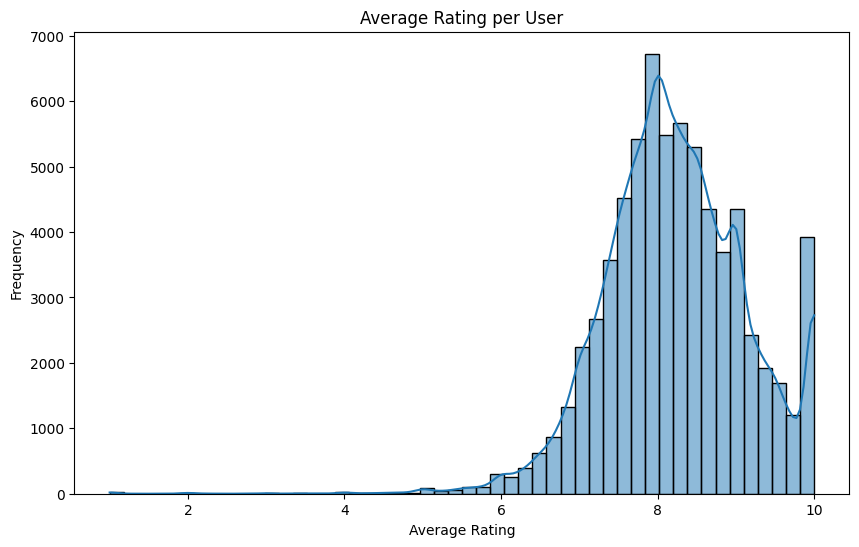

In [20]:
user_avg_rating = df_anime_user_rating.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10,6))
sns.histplot(user_avg_rating, bins=50, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

## **Data Visualization**

### For Anime Dataset

In [21]:
# Data Visualization
fig = px.scatter(df_anime, x='rating', y='members',
                 labels={'rating':'Overall rating', 'members':'Number of ratings'},
                 title='Anime rating vs. Number of ratings')
fig.show()

In [22]:

type_counts = df_anime['type'].value_counts()
fig = px.bar(type_counts, x=type_counts.index, y=type_counts.values, color=type_counts.index, 
             labels={'x':'Anime Type', 'y':'Count'},
             title='Count of Anime Titles by Type')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:
genre_counts = df_anime[df_anime['genre'] != "Unknown"]['genre'].apply(lambda x: x.split(', ')).explode().value_counts()
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Count of Anime Titles by Genre',
             color=genre_counts.index)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [24]:

fig = px.box(df_anime, x='type', y='rating',
             labels={'type':'Anime Type', 'rating':'Rating'},
             title='Distribution of Anime Ratings by Type',
             color='type')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## DATA PREPROCESSING <a id="chapter6"><a>

## MODEL TRAINING  <a id="chapter7"><a>

## MODEL PERFORMANCE <a id="chapter8"><a>

## CONCLUSION & INSIGHTS  <a id="chapter9"><a>